###imports

In [18]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
from skimage import io, color
import skimage as ski
import opencv

ImportError: No module named opencv

###get image

uint8
float64
(701, 701, 3)
RGB as doubles
0.780118302009
0.668190201756
0.74864266239


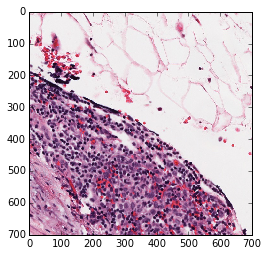

In [12]:
# image = io.imread('/Users/nathaning/Documents/Python/Image_Processing/B1 H&E 20x_002_5x2.tif')
# image = io.imread('/Users/nathaning/Downloads/stain_normalisation_toolbox/Images/Source_small.png')
image = io.imread('/Users/nathaning/Documents/MATLAB/Cedars/Color Normalization/imgs/B1 H&E 20x_002_7x2.tif')
print image.dtype
image = np.double(image)/np.double(255)
print image.dtype
print image.shape

print 'RGB means as doubles'
ii = image[:,:,0]
jj = image[:,:,1]
kk = image[:,:,2]
print np.mean(ii)
print np.mean(jj)
print np.mean(kk)
io.imshow(image)

#bcg_func

bool
(701, 701)


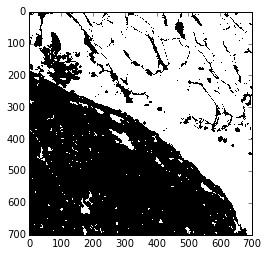

In [10]:
image2 = ski.img_as_uint(color.rgb2gray(image))

bcg = image2>55275

io.imshow(bcg)
print bcg.dtype
print bcg.shape

#colorNorm

LAB means before masking ------
72.2341535395 25.8643916968
14.6720572501 14.7682655031
-6.43171745796 8.36222877249
After masking ------
means  [51.057019977304378, 27.437985162557485, -12.273742715309533]
std  [21.014933411699179, 10.223304063537311, 8.3822542781748233]


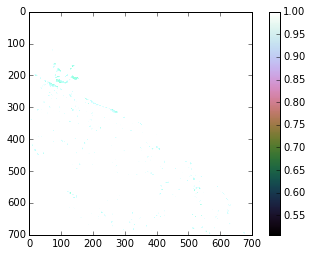

In [16]:
mst = np.array(([77.5121, 270.5718], [8.9287, -23.6535], [2.9664, 8.3857]))

lab = color.rgb2lab(image)

imM = []
imS = []
labnorm = np.empty_like(image)
print 'LAB means before masking ------'
for i in range(0,3):
    v = lab[:,:,i]
    print v.mean(), v.std()
    fg = ma.MaskedArray(v, mask=bcg)
    
    imgM = fg.mean()
    imgStd = fg.std()
    
    imM.append(imgM)
    imS.append(imgStd)
    
    labnorm[:,:,i] = (((v-imgM)/imgStd)*mst[i,0]+mst[i,1])

print '\nAfter masking ------'
print 'means ', imM
print 'std ', imS

rgbnorm = color.lab2rgb(labnorm)
io.imshow(rgbnorm)

# mean: 0.7239353, -0.0670163, 0.0219133
# std: 0.3169273, 0.0411593, 0.0138033

## image deconstruction, reconstruction

float64


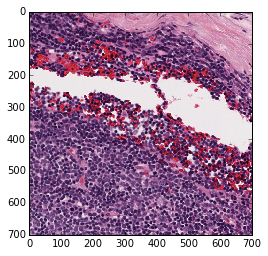

In [113]:
# bcg_dec = np.reshape(bcg, (1, bcg.shape[0]*bcg.shape[1]))
# bcg_rec = np.reshape(bcg_dec, (bcg.shape[0], bcg.shape[1]))
# io.imshow(bcg_rec)

im_dec = np.reshape(image, (3, image.shape[0]*image.shape[1]))
im_rec = np.reshape(im_dec, (image.shape[0], image.shape[1], 3))
print im_rec.dtype
io.imshow(im_rec)

In [160]:
color.lab2rgb??

In [207]:
# lab = color.rgb2lab(image)
imR = image[:,:,0]*255
print imR.mean()

147.052804165


###ma.MaskedArray test

In [192]:
m = np.array(([1,2,3],[4,5,6],[7,8,9]))
print m
mm = np.array(([False, True, True], [False, True, True], [True, True, True]))
print mm

md = ma.MaskedArray(m, mask=mm)
print md.mean()

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False  True  True]
 [False  True  True]
 [ True  True  True]]
2.5
